# ⚠️NO MORE SUBMISSION ERROR⚠️

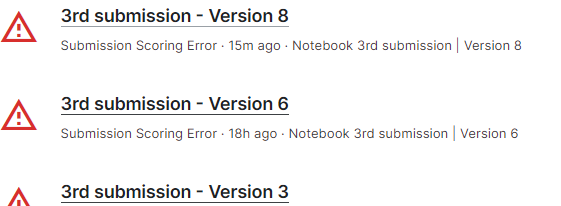


This competition limited submission once a day, and what's the worst is, **submission error is also counted as "1 submit"** so we must wait next day to debug it...  
I summarized how to solve them for myself, and hope it helps you.

## ~ contents ~
**1. copy "Output" path and implement to code for using correct path**  
**2. set output file name as "submission.csv" strictly**  
**3. fill or drop "NaN" from train and TEST data**    
**4. use sample submission file**  
**5. use only one probability (optional)**  
**6. set "index=None" option in "pd.to_csv()"**  
**7. confirm output file (location and contents)**  
**8. make utility script when succeeded**  
 
# 1. copy "Output" path and implement to code for using correct path
Very elementary but important things.
Copy output path from side bar and make dict like below code.  
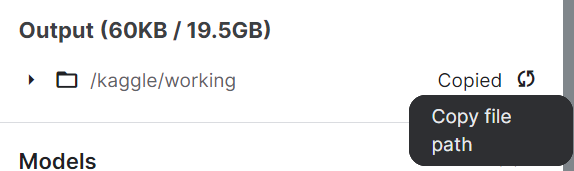


In [1]:
#define files and dirs
dirs={
    "input":"/kaggle/input/icr-identify-age-related-conditions/",
    "output":"/kaggle/working/"
}

# 2. set output file name as "submission.csv" strictly
file name must be set as **"submission.csv"** strictly. DO NOT change any other words.  
My first submission file was "submit.csv" but of course raised error...

In [2]:
files={
    "train":"train.csv",
    "test":"test.csv",
    "greeks":"greeks.csv",
    "sample_submission":"sample_submission.csv",
    "submission":"submission.csv"
}

# 3. fill or drop "NaN" from train and **TEST** data
Obviously we can see contents of "test.csv", it's filled by 0.0 or "A" in all columns.
But what you see is not all there is...  
When clicking "Submit" button, our model is **evaluated with a different file than the published "test.csv" file** .  
And **it probably contains "NaN" data** so when we use particular model (like Decision Tree in sklearn or Nural Network) outputs NaN value in submission file...  
***get this error when I change model: for example, from lightGBM(allow NaN input) to Decision Tree in sklearn, Neural Network(prohibit NaN),...***.

In [3]:
import pandas as pd
#read file
train=pd.read_csv(dirs["input"]+files["train"])
test=pd.read_csv(dirs["input"]+files["test"])

#Convert Qualitative value to Quantitative one
train["EJ"]=train["EJ"].map({"A":0,"B":1}).astype(int)
test["EJ"]=test["EJ"].map({"A":0,"B":1}).astype(int)

###### IMPORTANT: fill NaN values  ######
train=train.fillna(0)
test=test.fillna(0)

And here is the simple model for example.  

In [4]:
#Fit and Predict
from lightgbm import LGBMClassifier
model=LGBMClassifier()
model.fit(train.loc[:,~train.columns.isin(["Id","Class"])],train.loc[:,"Class"])
predict=model.predict_proba(test.loc[:,test.columns!="Id"])
print(predict)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[[0.99690471 0.00309529]
 [0.99690471 0.00309529]
 [0.99690471 0.00309529]
 [0.99690471 0.00309529]
 [0.99690471 0.00309529]]


# 4. use sample submission file
To assure column definition, use sample submission file.  
It makes absolutely sure that every word is correct.

In [5]:
submission=pd.read_csv(dirs["input"]+files["sample_submission"]) #read "sample_submission.csv"

# 5. use only one probability (optional)
It seems no restriction in this competition, but this is one suggestion of countermeasure.  
We got 2 probabilities for class 0 and class 1, but when submit, use just only one to prevent the total from being any other than 1.0.  
it can avoid rounding error. 

In [6]:
submission["Id"]=test["Id"]
submission["class_0"]=predict[:,0]
submission["class_1"]=1.-predict[:,0] #IMPORTANT: do not use predict[:,1]

# 6. set "index=None" option in "pd.to_csv()"
If you use pandas to output submission, this is the last trap to raise submission error...  
If we don't set any option in "pd.to_csv()", it will cause error due to add index column to "subbmission.csv" automatically...***oh what a kindness!😊***

In [7]:
#and finally...make submission.csv!!
submission.to_csv(dirs["output"]+files["submission"],index=None) #IMPORTANT: do not forget "index=None"
submission

,Id,class_0,class_1
0,00eed32682bb,0.996905,0.003095
1,010ebe33f668,0.996905,0.003095
2,02fa521e1838,0.996905,0.003095
3,040e15f562a2,0.996905,0.003095
4,046e85c7cc7f,0.996905,0.003095


# 7. confirm output file (location and contents)
## 1) location
if you set path and filename correctly, and your model works well, you can see "submission.csv" in "/kaggle/working" folder.  
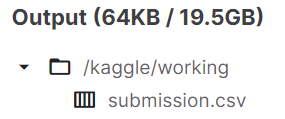

## 2) contents
check "submission.csv" in Output folder with no NaN or other invalid data.

## Okay, everything is done. push "Submit" button with TOTAL CONCENTRATION
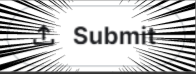

# 8. make utility script when succeeded
if succeeded, highly recommend to make utility script for submission in order to utilize it in other notebooks!

In [8]:
# define files and dirs
dirs={
    "input":"/kaggle/input/icr-identify-age-related-conditions/",
    "output":"/kaggle/working/"
}
files={
    "train":"train.csv",
    "test":"test.csv",
    "greeks":"greeks.csv",
    "sample_submission":"sample_submission.csv",
    "submission":"submission.csv"
}
def submit(predict):
    submission=pd.read_csv(dirs["input"]+files["sample_submission"]) #read "sample_submission.csv"
    submission["Id"]=test["Id"]
    submission["class_0"]=predict[:,0]
    submission["class_1"]=1.-predict[:,0] #IMPORTANT: do not use predict[:,1]
    #and finally...make submission.csv!!
    submission.to_csv(dirs["output"]+files["submission"],index=None) #IMPORTANT: do not forget "index=None"
    return submission

Then we can go to next stage at last...  
If any comments or advice, please tell me!